In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair

pd.set_option('display.max_columns', None)

In [165]:
df = pd.read_csv('../data/clean_metrics_19_22.csv')

In [166]:
df.groupby('year')['passenger_miles'].apply(lambda x: x.isna().sum())

year
2019    5
2020    0
2021    0
2022    0
Name: passenger_miles, dtype: int64

In [167]:
df.sample()

,agency,city,state,legacy_ntd_id,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,passengers_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,any_data_questionable?,year,uace_code,uza_name
9564,"Orange County , dba: Orange County Public Tran...",Hillsborough,NC,4231,40231,"City, County or Local Government Unit or Depar...",Reduced Reporter,347602.0,14.0,DR,DO,10.0,10.55,0.14,83.12,1.1,77.63,0.0,128377.0,944286.0,12164.0,11360.0,0.0,196329.0,No,2021,NaN,NaN


The top 10 transit agencies account for 50% of all passenger miles.

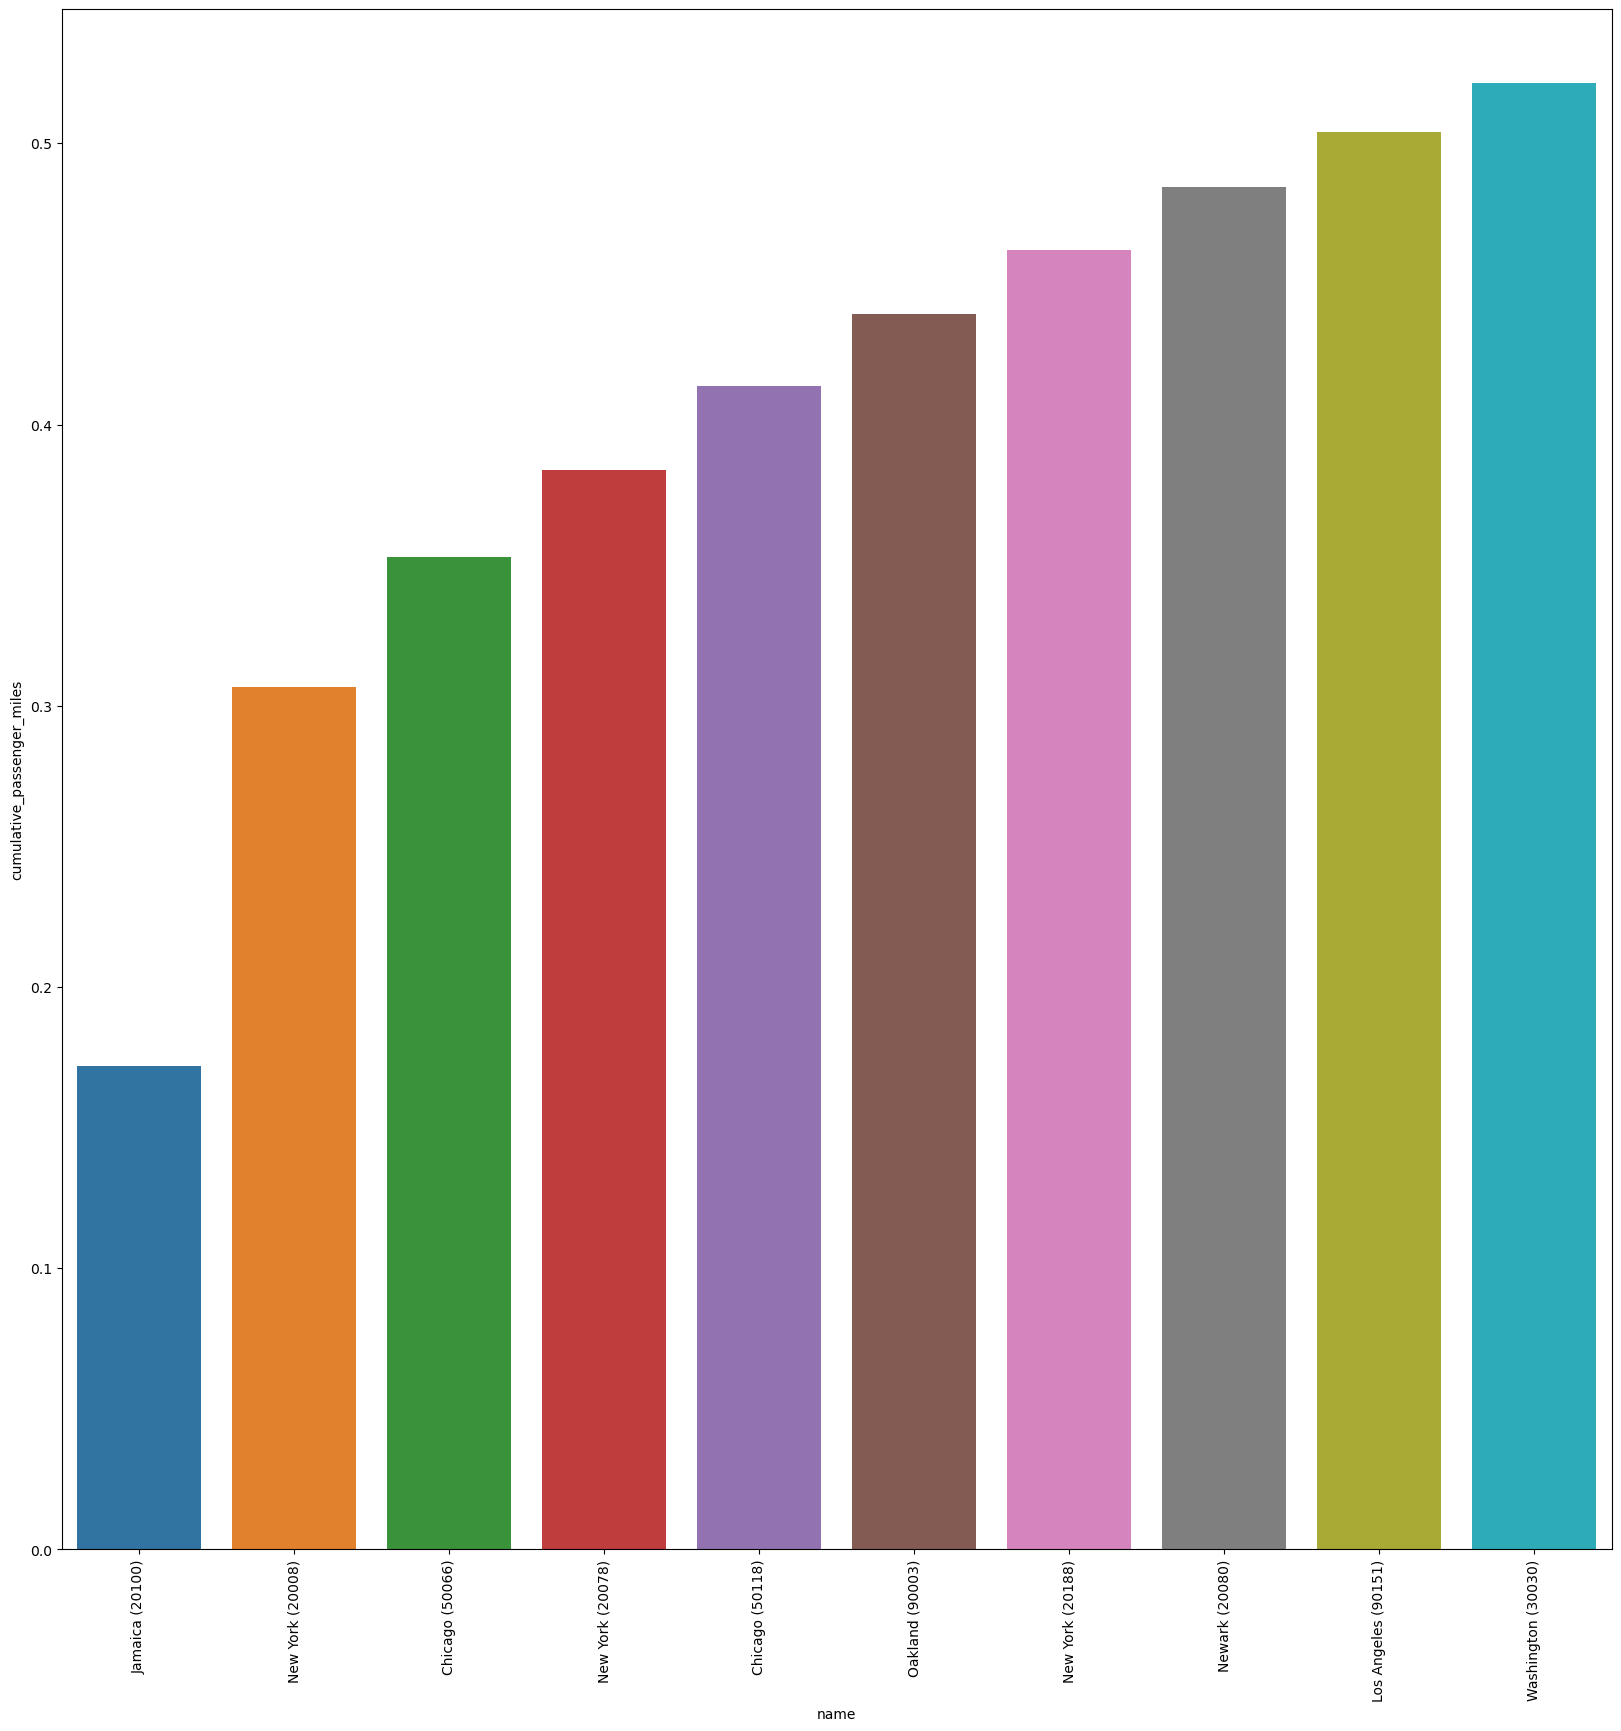

In [168]:
# Calculate the cumulative sum of the 'passenger_miles' column and add it as a new column
group = df.groupby(['ntd_id']).passenger_miles.mean().sort_values(ascending=False).reset_index()
total_miles = group.passenger_miles.sum()
group['cumulative_passenger_miles'] = group['passenger_miles'].cumsum() / total_miles
group = group.head(10)
group['name'] = group.ntd_id.apply(lambda x: f'{df[df.ntd_id == x].city.values[0]} ({x})')

plt.figure(figsize=(20, 20))
sns.barplot(group, x='name', y='cumulative_passenger_miles')
plt.xticks(rotation=90)  # Rotate labels to be vertical
plt.show()

The top 100 account for about 85%.

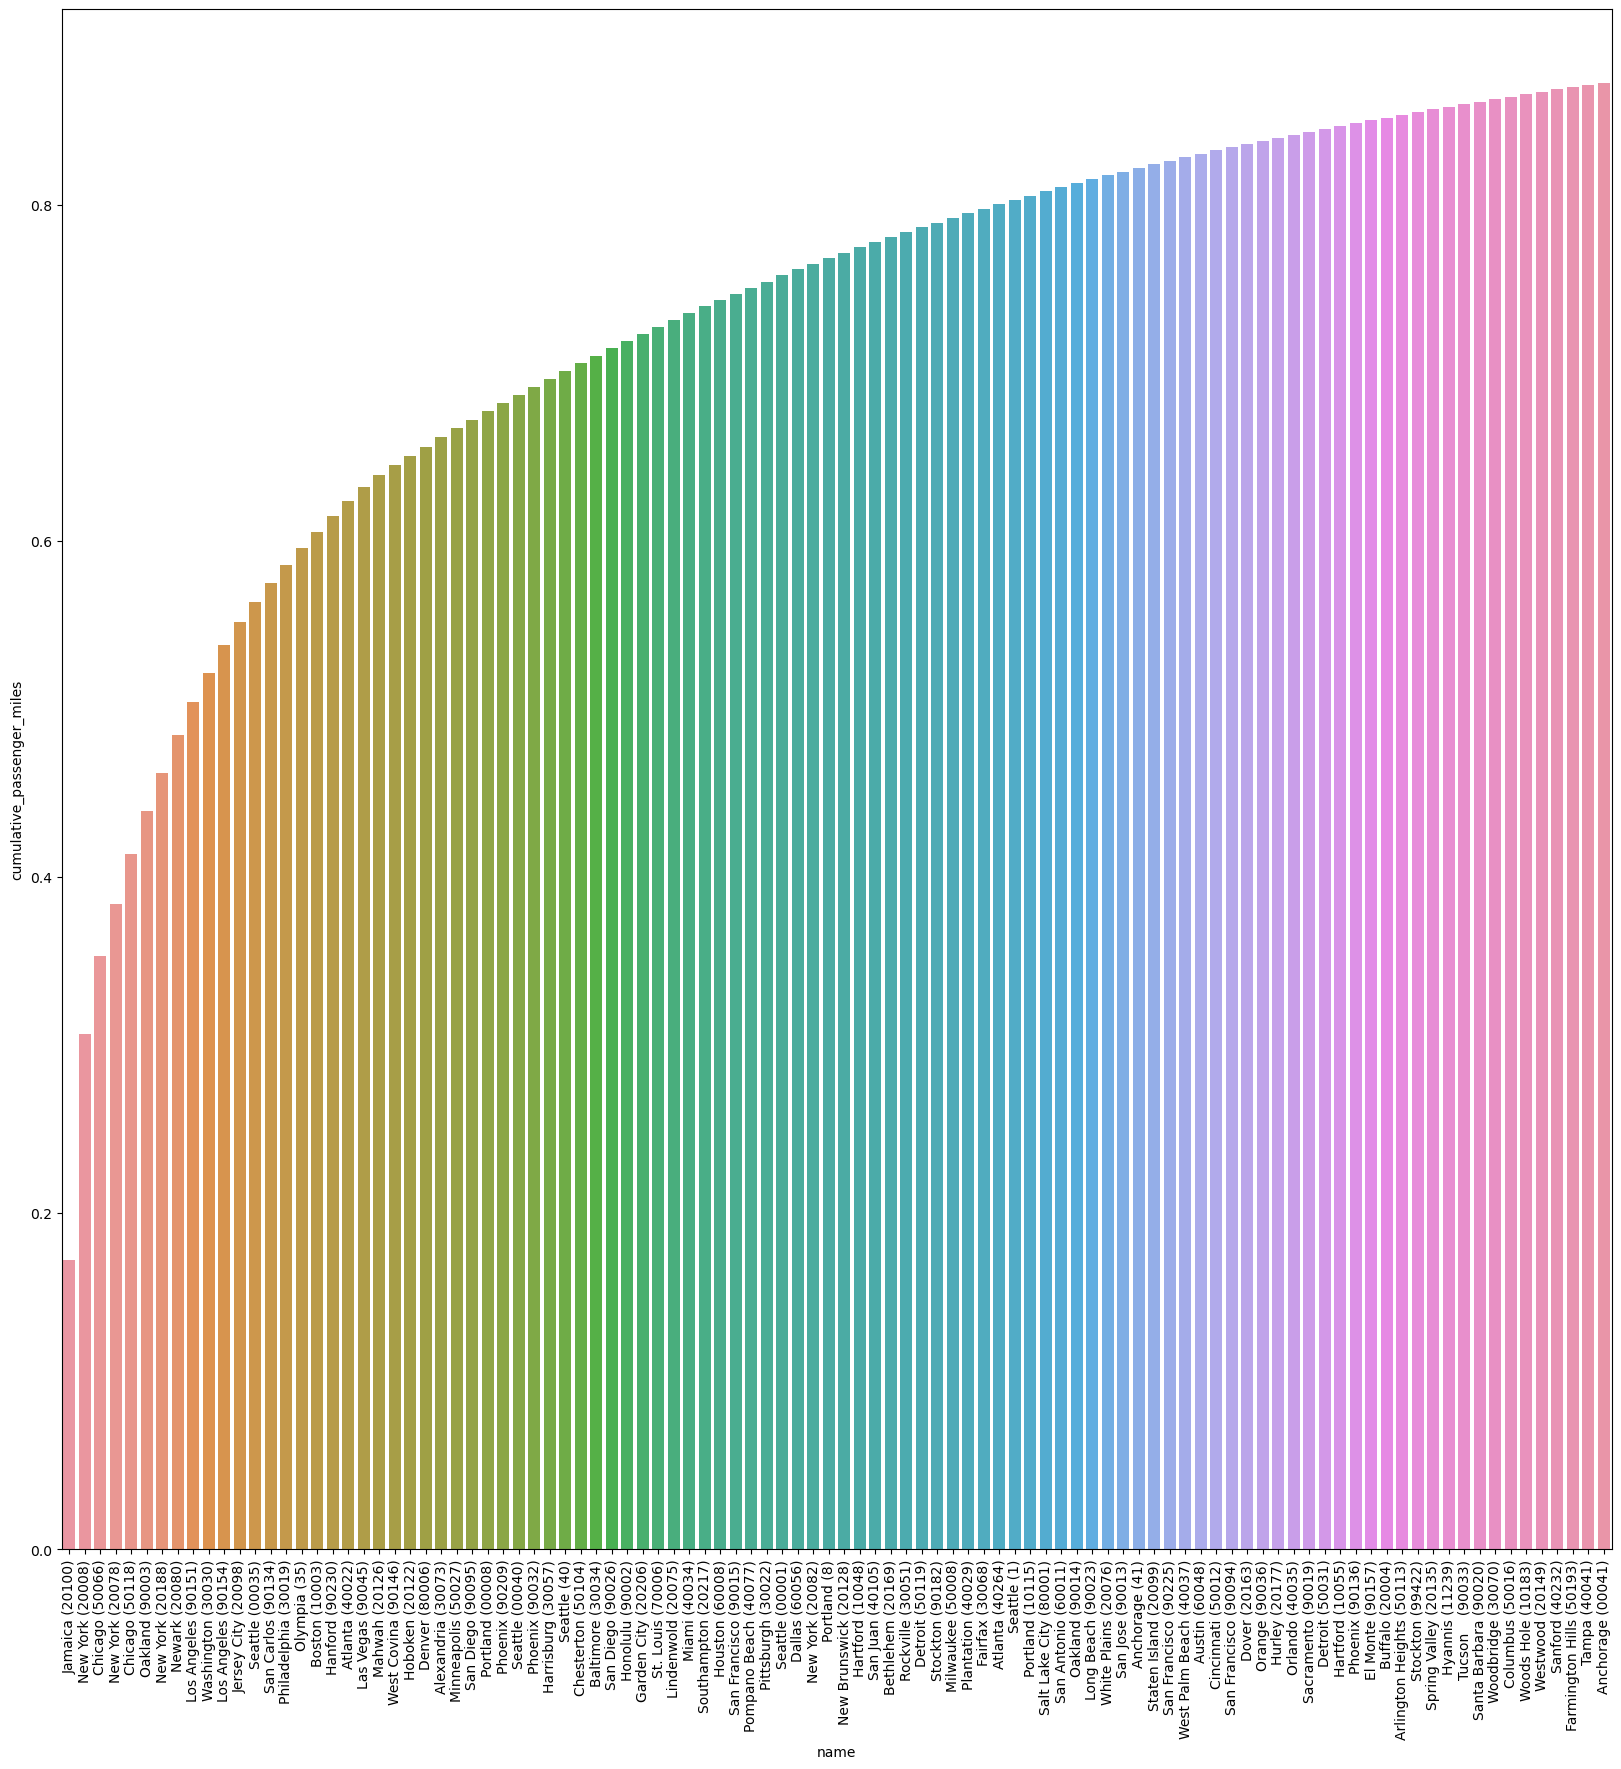

In [169]:
# Calculate the cumulative sum of the 'passenger_miles' column and add it as a new column
group = df.groupby(['ntd_id']).passenger_miles.mean().sort_values(ascending=False).reset_index()
total_miles = group.passenger_miles.sum()
group['cumulative_passenger_miles'] = group['passenger_miles'].cumsum() / total_miles
group = group.head(100)
group['name'] = group.ntd_id.apply(lambda x: f'{df[df.ntd_id == x].city.values[0]} ({x})')

plt.figure(figsize=(20, 20))
sns.barplot(group, x='name', y='cumulative_passenger_miles')
plt.xticks(rotation=90)  # Rotate labels to be vertical
plt.show()

In [172]:
def yearly_breakdown(df, col, topn=None):
    if topn is None:
        top = df
    else:
        topids = df.groupby('ntd_id')[col].mean().sort_values(ascending=False).head(topn).index
        top = df[df.ntd_id.isin(topids)]
    group = top.groupby('year')[col].mean().reset_index()
    sns.barplot(data=group, x='year', y=col)

    title = f'{col}'
    if topn is not None:
        title = title + f' Top {topn}'
    plt.title(title)
    plt.show()

Passenger miles have sharply declined in the top 20 agencies.

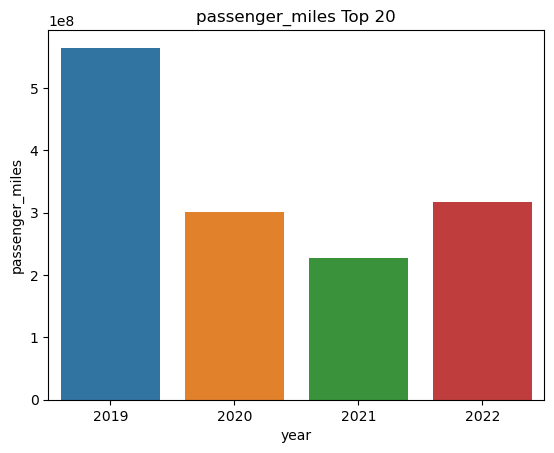

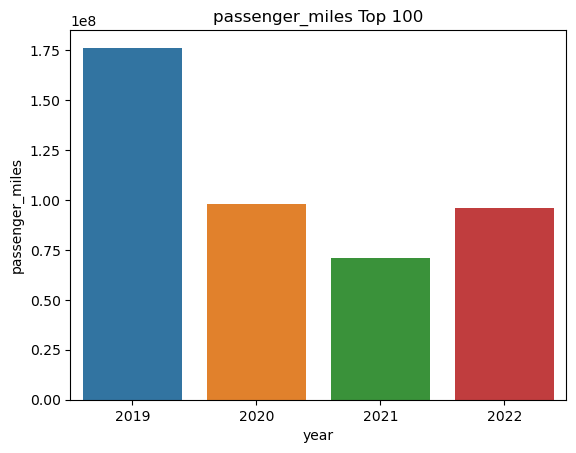

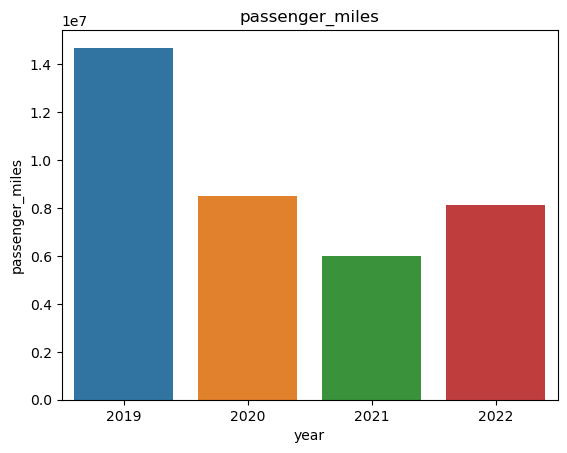

In [173]:
yearly_breakdown(df, 'passenger_miles', 20)
yearly_breakdown(df, 'passenger_miles', 100)
yearly_breakdown(df, 'passenger_miles')

Cost per passenger mile has sharply increased for top 20, 100, and all agencies. However, the cost increase is most sharp for the top agencies. 

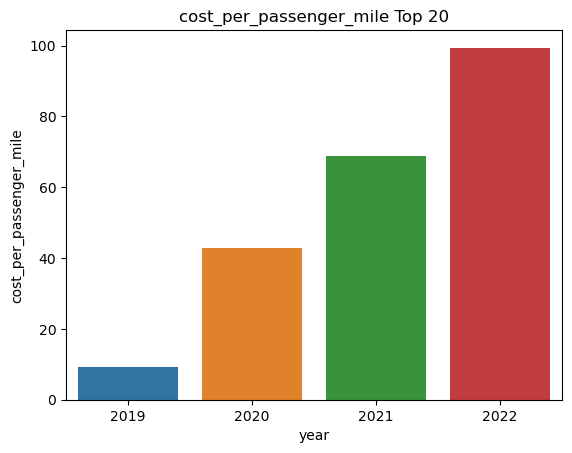

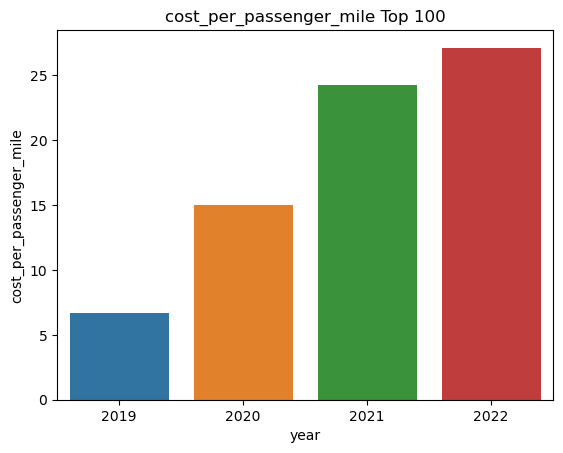

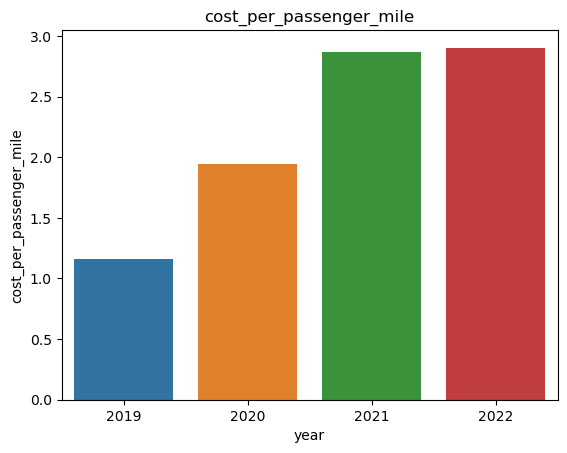

In [175]:
yearly_breakdown(df, 'cost_per_passenger_mile', 20)
yearly_breakdown(df, 'cost_per_passenger_mile', 100)
yearly_breakdown(df, 'cost_per_passenger_mile', None)

In [179]:
df.sample()

,agency,city,state,legacy_ntd_id,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,passengers_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,any_data_questionable?,year,uace_code,uza_name
5288,"Chemung County, dba: C TRAN",Elmira,NY,2005,20005,"City, County or Local Government Unit or Depar...",Reduced Reporter,67983.0,24.0,DR,PT,7.0,2.14,0.03,152.65,2.4,64.15,0.0,16335.0,490452.0,7645.0,3213.0,0.0,50378.0,No,2020,NaN,NaN


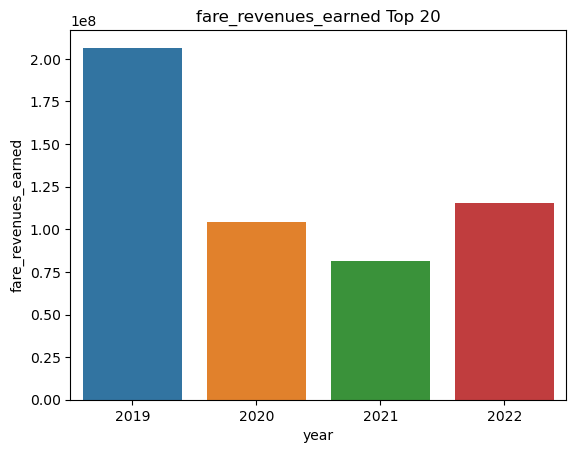

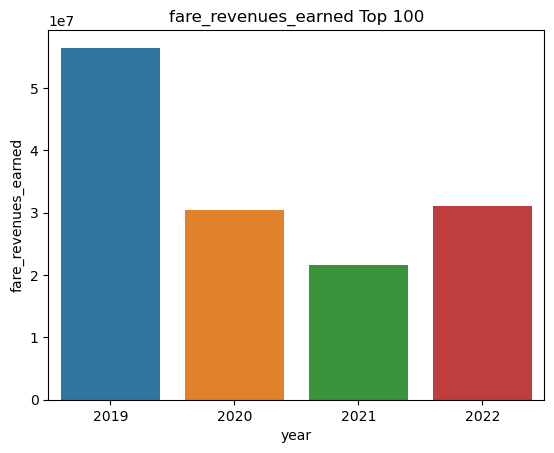

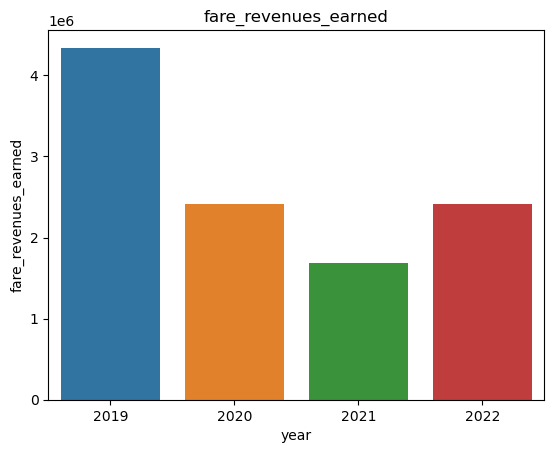

In [180]:
yearly_breakdown(df, 'fare_revenues_earned', 20)
yearly_breakdown(df, 'fare_revenues_earned', 100)
yearly_breakdown(df, 'fare_revenues_earned', None)

Operating expenses saw a small increase but have gone back to their pre-COVID levels or even a bit higher.

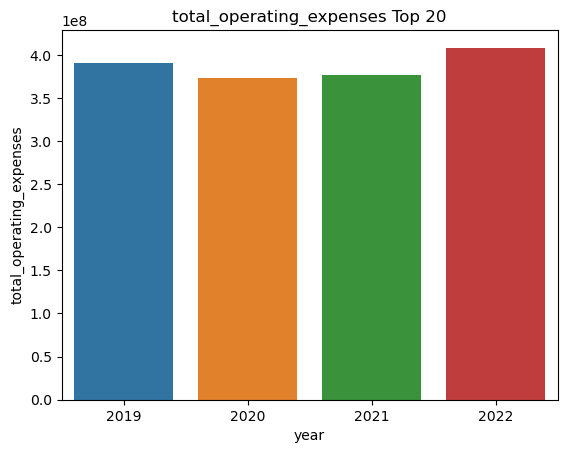

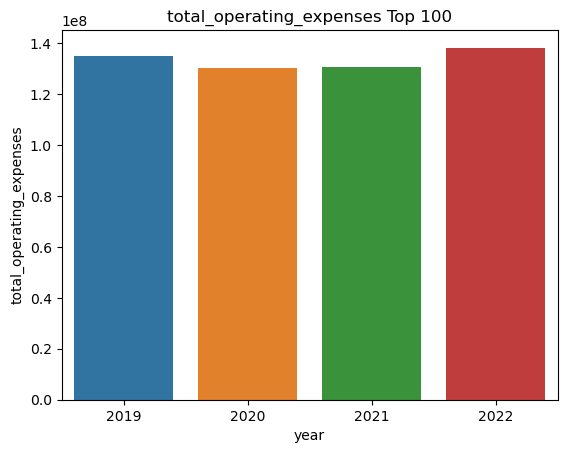

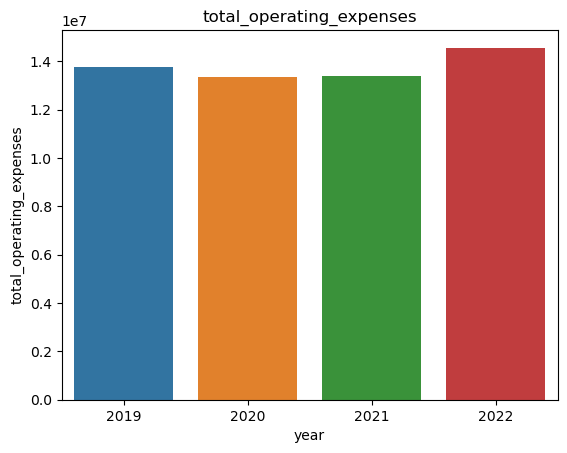

In [181]:
yearly_breakdown(df, 'total_operating_expenses', 20)
yearly_breakdown(df, 'total_operating_expenses', 100)
yearly_breakdown(df, 'total_operating_expenses', None)

In [182]:
df.sample()

,agency,city,state,legacy_ntd_id,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,passengers_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,any_data_questionable?,year,uace_code,uza_name
12457,Central Community Transit,Willmar,MN,NaN,55314,Independent Public Agency or Authority of Tran...,Rural Reporter,NaN,28.0,MB,DO,7.0,5.42,0.22,83.06,NaN,24.39,0.0,120745.0,543063.0,22266.0,6538.0,0.0,82981.0,NaN,2022,NaN,NaN


What transportation modes seem the most important?

In [208]:
mode_dict = {
    "AR": "Alaska Railroad",
    "MB": "Bus",
    "RB": "Bus Rapid Transit",
    "CC": "Cable Car",
    "CB": "Commuter Bus",
    "CR": "Commuter Rail",
    "DR": "Demand Response",
    "DT": "Demand Response Taxi",
    "FB": "Ferryboat",
    "HR": "Heavy Rail",
    "YR": "Hybrid Rail",
    "IP": "Inclined Plane",
    "LR": "Light Rail",
    "MG": "Monorail/Automated Guideway",
    "SR": "Streetcar Rail",
    "TB": "Trolleybus",
    "VP": "Vanpool",
    "JT": "Jitney",
    "TR": "Aerial Tramway",
    "PB": "Publico"
}
df['mode_full_name'] = df['mode'].apply(lambda x: mode_dict[x] if not pd.isna(x) else x)

Many of the top mode/agency combinations are some kind of rail.

In [209]:
df.groupby(['city', 'ntd_id', 'mode_full_name']) \
    .passenger_miles.mean().sort_values(ascending=False).head(20)

city          ntd_id  mode_full_name
New York      20008   Heavy Rail        1.046278e+10
Brooklyn      20008   Heavy Rail        5.800255e+09
Jamaica       20100   Commuter Rail     2.100209e+09
New York      20008   Bus               1.478430e+09
Newark        20080   Commuter Rail     1.285259e+09
New York      20078   Commuter Rail     1.128317e+09
Brooklyn      20008   Bus               9.671677e+08
Oakland       90003   Heavy Rail        9.357407e+08
Chicago       50066   Heavy Rail        7.438415e+08
Washington    30030   Heavy Rail        7.259552e+08
Jersey City   20098   Heavy Rail        4.470207e+08
Boston        10003   Commuter Rail     4.074480e+08
Newark        20080   Bus               3.986307e+08
Chicago       50066   Bus               3.835275e+08
Los Angeles   90154   Bus               3.792204e+08
Chicago       50118   Commuter Rail     3.639598e+08
Boston        10003   Heavy Rail        3.480195e+08
Los Angeles   90154   Light Rail        2.790857e+08
Philadelp

Surprisingly (to me), buses are a negligible fraction of passenger miles traveled. 

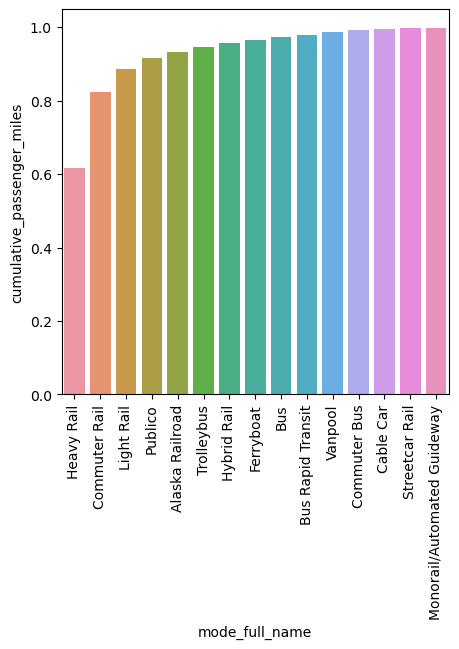

In [213]:
col = 'passenger_miles'
topn = 15

group = df.groupby(['mode_full_name'])[col].mean().sort_values(ascending=False).reset_index()
total_miles = group[col].sum()
group[f'cumulative_{col}'] = group[col].cumsum() / total_miles

group = group.head(topn)

plt.figure(figsize=(5, 5))
sns.barplot(group, x='mode_full_name', y=f'cumulative_{col}')
plt.xticks(rotation=90)  # Rotate labels to be vertical
plt.show()

In [235]:
def yearly_breakdown_by_mode(df, col, modes, topn_agencies=None):
    """
        Modes is a list of mode_full_name values.
    """

    df = df.copy()

    if len(modes) > 0:
        df = df[df['mode_full_name'].isin(modes)]

    if topn_agencies is not None:
        topids = df.groupby('ntd_id')[col].mean() \
            .sort_values(ascending=False).head(topn_agencies).index
        df = df[df.ntd_id.isin(topids)]
    group = df.groupby(['year', 'mode_full_name'])[col].mean().reset_index()
    sns.barplot(data=group, x='year', y=col, hue='mode_full_name')

    title = f'{col}'

    if topn_agencies is not None:
        title = title + f' Top {topn_agencies}.'
    if modes is not None:
        title = title + f' Modes: {modes}'
    plt.title(title)
    plt.show()

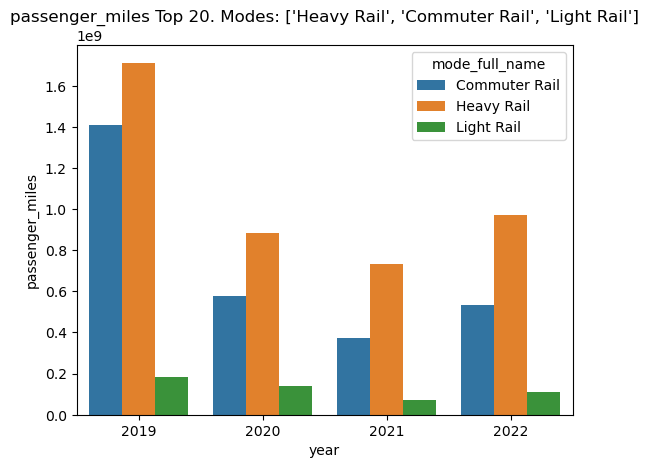

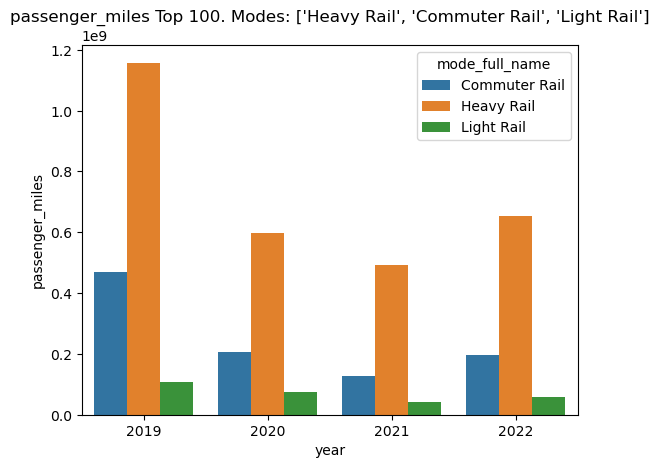

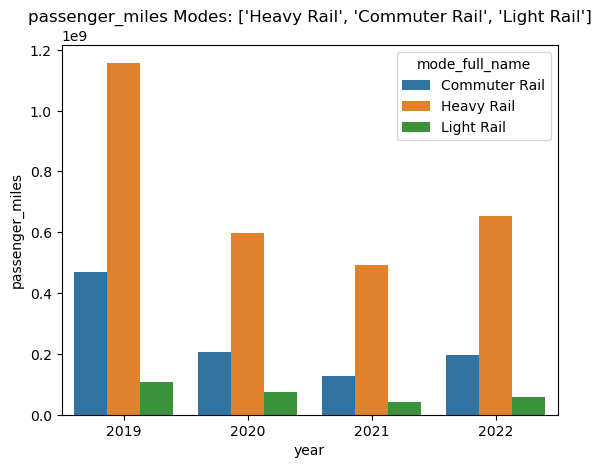

In [236]:
yearly_breakdown_by_mode(
    df, 
    'passenger_miles',
    ['Heavy Rail', 'Commuter Rail', 'Light Rail'], 
    20
)

yearly_breakdown_by_mode(
    df, 
    'passenger_miles',
    ['Heavy Rail', 'Commuter Rail', 'Light Rail'], 
    100
)

yearly_breakdown_by_mode(
    df, 
    'passenger_miles',
    ['Heavy Rail', 'Commuter Rail', 'Light Rail'], 
    None
)

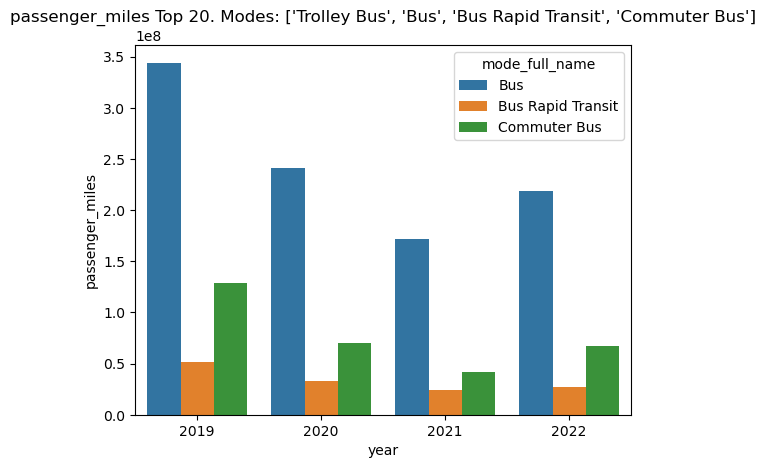

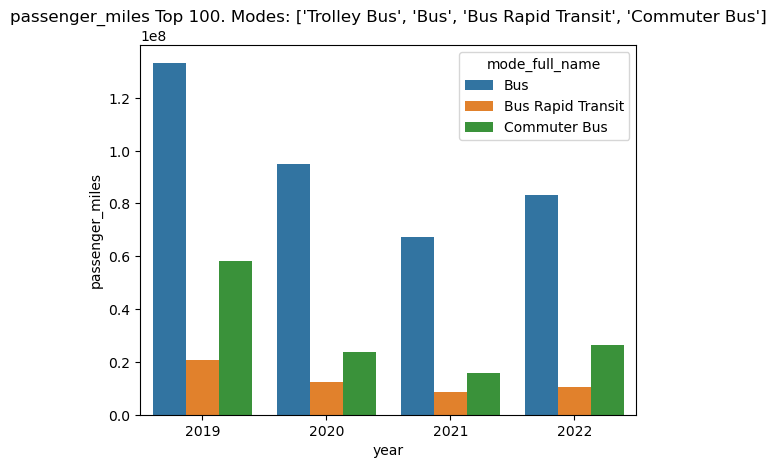

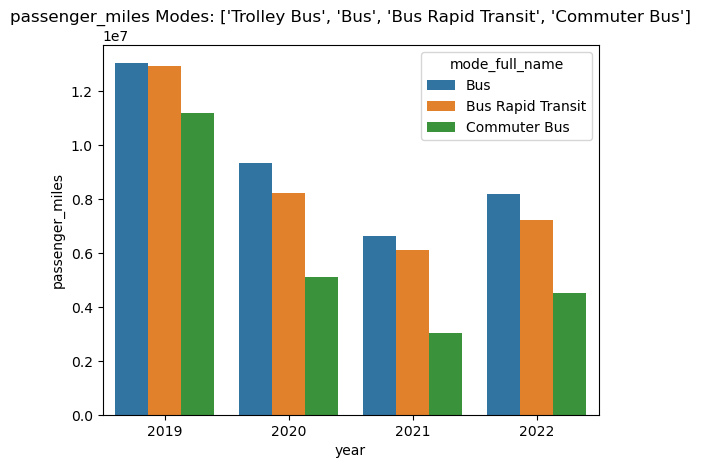

In [237]:
yearly_breakdown_by_mode(
    df, 
    'passenger_miles',
    ['Trolley Bus', 'Bus', 'Bus Rapid Transit', 'Commuter Bus'], 
    20
)

yearly_breakdown_by_mode(
    df, 
    'passenger_miles',
    ['Trolley Bus', 'Bus', 'Bus Rapid Transit', 'Commuter Bus'], 
    100
)

yearly_breakdown_by_mode(
    df, 
    'passenger_miles',
    ['Trolley Bus', 'Bus', 'Bus Rapid Transit', 'Commuter Bus'], 
    None
)